# Visualize Networkss

In [2]:
# Mathematical and Data Managment
import numpy as np
import pandas as pd
import scipy.sparse as sp

# Graph Managment
import graph_tool.all as gt
import networkx as nx
from utils.subutils.Functions import *
from utils.Segregation import *

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from fa2.forceatlas2 import ForceAtlas2

# Miscellaneous
from glob import glob
from tqdm import tqdm
import random
import time
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from datetime import datetime, timedelta

random.seed(2)

# Create ForceAtlas2 object with desired parameters
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

/mnt/disk2/anaconda3/envs/gt_global/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:1544: RuntimeWarning: Error importing Gtk module: ; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [3]:
# Load the graph
test_file = "/mnt/disk2/Data/3_Day_Graphs/starting_2021-05-03.graphml"

# Load Grap
g = gt.load_graph(test_file)
#pos = gt.fruchterman_reingold_layout(g, n_iter=50)
#g.vp['Fruchterman layout'] = pos
g.set_directed(False)
g_nx = to_networkx(g)

date = test_file.split('.')[-2].split('/')[-1].split('_')[1]

### Testing the package

  2%|▏         | 78/5000 [00:00<00:06, 770.94it/s]

100%|██████████| 5000/5000 [00:08<00:00, 589.84it/s]


BarnesHut Approximation  took  4.62  seconds
Repulsion forces  took  3.03  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.10  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


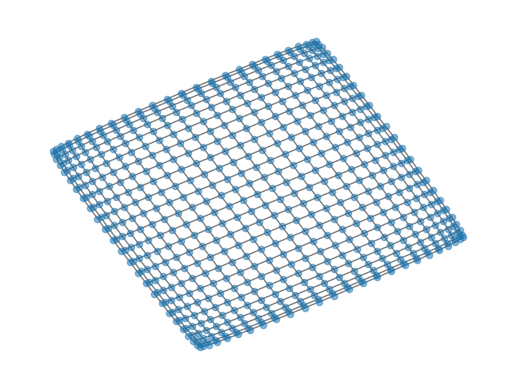

In [2]:
G = nx.grid_2d_graph(25, 25)
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=5000)
nx.draw_networkx(G, positions, node_size=20, with_labels=False, alpha=0.5)
plt.axis('off')
plt.show()

100%|██████████| 2000/2000 [00:02<00:00, 769.20it/s]

BarnesHut Approximation  took  1.30  seconds
Repulsion forces  took  0.85  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.27  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


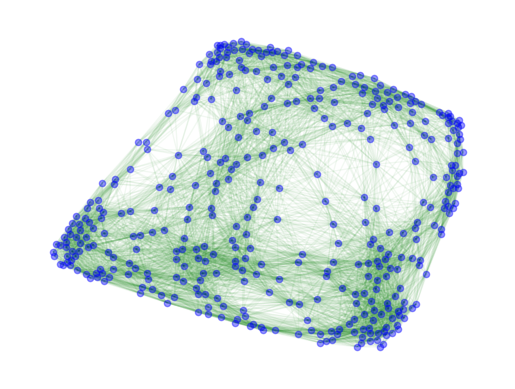

In [9]:
G = nx.random_geometric_graph(400, 0.2)
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

100%|██████████| 10000/10000 [00:00<00:00, 202152.67it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


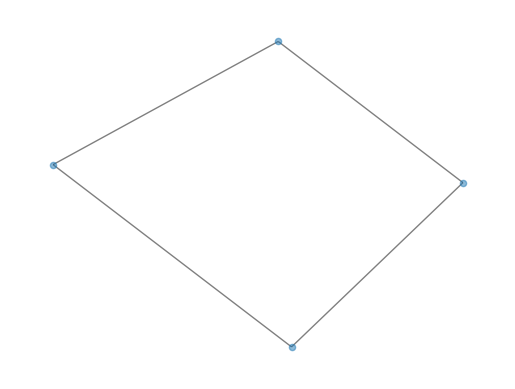

In [5]:
# run forceatlas2
G = np.array([[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]) # simple 2x2 grid graph
positions = forceatlas2.forceatlas2(G, pos=None, iterations=10000)

# To plot the graph
networkx_graph = nx.from_numpy_array(G)
nx.draw_networkx(networkx_graph, positions, node_size=20, with_labels=False, alpha=0.5)
plt.axis('off')
plt.show()

100%|██████████| 2000/2000 [00:00<00:00, 7768.35it/s]


BarnesHut Approximation  took  0.09  seconds
Repulsion forces  took  0.11  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


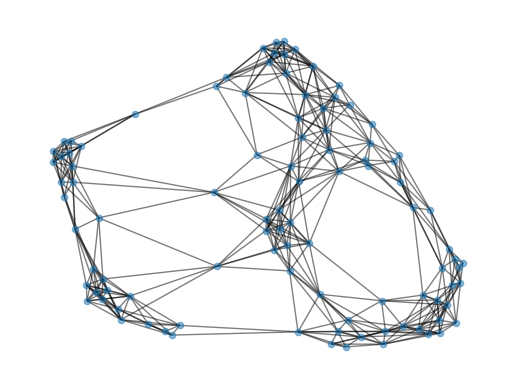

In [6]:
import igraph

# Construct an iGraph
G = nx.random_geometric_graph(100, 0.2)
iG = igraph.Graph.TupleList(G.edges(), directed=False) # converting to iGraph
iG.es['weight'] = np.random.randint(low=1, high=10, size=len(G.edges())) # set random edge weights

# run forceatlas2 on iGraph
layout = forceatlas2.forceatlas2_igraph_layout(iG, pos=None, iterations=2000, weight_attr='weight')

# plot iGraph (using Networkx or you can use iGraph plot func too)
nxG = nx.Graph(iG.get_edgelist())
positions = layout.coords
nx.draw_networkx(nxG, positions, node_size=20, with_labels=False, alpha=0.5)
plt.axis('off')
plt.show()

In [3]:
# Load the graph
test_file = "/mnt/disk2/Data/3_Day_Graphs/starting_2021-05-03.graphml"

# Load Grap
g = gt.load_graph(test_file)

g.set_directed(False)
g_nx = to_networkx(g)

date = test_file.split('.')[-2].split('/')[-1].split('_')[1]

In [4]:
# Get rid of self loops
g_nx.remove_edges_from(nx.selfloop_edges(g_nx))

# Find Largest Component
largest_cc = max(nx.connected_components(g_nx), key=len)

# Create a subgraph from the combined components
subgraph = g_nx.subgraph(largest_cc)

In [5]:
print('Grafo Completo NO dirigido')
print(g_nx)
print('-'*20)
print('Sub Grafo Comoponente más grande')
print(subgraph)


Grafo Completo NO dirigido
Graph with 32883 nodes and 713066 edges
--------------------
Sub Grafo Comoponente más grande
Graph with 32770 nodes and 713042 edges


In [43]:
positions_df = pd.read_csv('/home/fcastrillon/Data/3_Day_Graphs/positions.csv', sep=';')
gephi_pos = {i.Id: (i.X, i.Y) for i in positions_df.itertuples()}

In [5]:
print('Layout Grafo Completo', g_nx)
layout_g_nx = forceatlas2.forceatlas2_networkx_layout(g_nx, pos=None, iterations=1000)
print('')
print('Layout Componente más grande', subgraph)
layout_subgraph = forceatlas2.forceatlas2_networkx_layout(subgraph, pos=None, iterations=1000)

Layout Grafo Completo Graph with 32883 nodes and 713066 edges


100%|██████████| 100/100 [02:06<00:00,  1.26s/it]


BarnesHut Approximation  took  350.99  seconds
Repulsion forces  took  457.98  seconds
Gravitational forces  took  0.27  seconds
Attraction forces  took  18.12  seconds
AdjustSpeedAndApplyForces step  took  0.49  seconds

Layout Componente más grande Graph with 32770 nodes and 713042 edges


100%|██████████| 1000/1000 [13:17<00:00,  1.25it/s]

BarnesHut Approximation  took  349.46  seconds
Repulsion forces  took  423.17  seconds
Gravitational forces  took  0.27  seconds
Attraction forces  took  17.71  seconds
AdjustSpeedAndApplyForces step  took  0.49  seconds


In [ ]:
# Find all strongly connected components
strongly_connected = list(nx.strongly_connected_components(G))

# Force Atlas 2 using Networkx Package

## all the graph

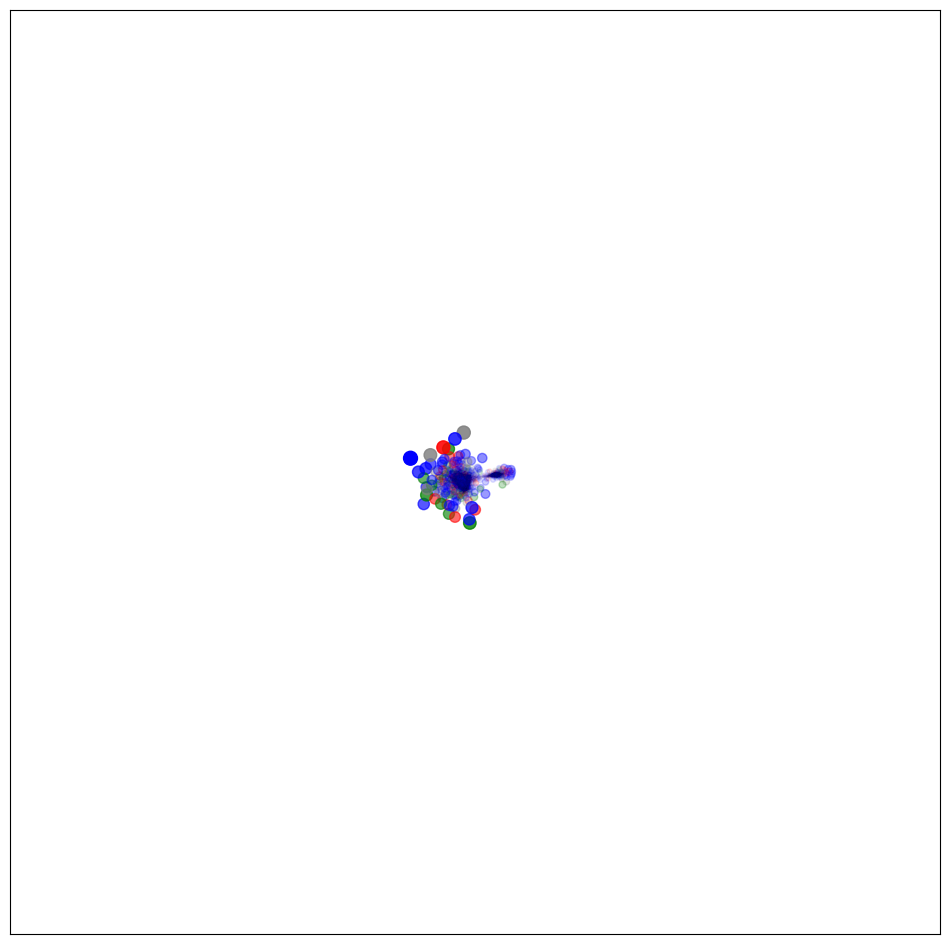

In [10]:
# Color
color_map_dict = {
    'No Retweets': 'gray',
    'Izquierda': 'blue',
    'Derecha': 'red',
    'Centro': 'green'
}
color_map_node = [color_map_dict[g_nx.nodes[node]['Political Label']] for node in g_nx]
color_edge_map = [color_map_dict[g_nx.nodes(data=True)[edge[1]]['Political Label']] for edge in list(g_nx.edges(data=True))]

# Alpha
degrees = dict(g_nx.degree())
max_degree = max(degrees.values())
alpha_values = [(degree / max_degree) for degree in degrees.values()]

# Size
node_degrees = [g_nx.degree(node) * 100 for node in g_nx.nodes()]
def normalize(x, max, min):
    return 100 * ((x - min)/(max - min))
max_deg = max(node_degrees)
min_deg = min(node_degrees)
node_size = list(map(lambda x: normalize(x, max_deg, min_deg), node_degrees))

fig, ax = plt.subplots(figsize = (12,12))

nx.draw_networkx_nodes(g_nx, layout_g_nx, node_color = color_map_node, node_size = node_size, ax = ax, alpha = alpha_values)
#nx.draw_networkx_edges(g_nx, layout, edge_color=color_edge_map, alpha = 0.01)
plt.show()

## All the Graph but with colored edges

In [13]:
# Color
color_map_dict = {
    'No Retweets': 'gray',
    'Izquierda': 'blue',
    'Derecha': 'red',
    'Centro': 'green'
}
color_map_node = [color_map_dict[g_nx.nodes[node]['Political Label']] for node in g_nx]
color_edge_map = [color_map_dict[g_nx.nodes(data=True)[edge[1]]['Political Label']] for edge in list(g_nx.edges(data=True))]

# Alpha
degrees = dict(g_nx.degree())
max_degree = max(degrees.values())
alpha_values = [(degree / max_degree) for degree in degrees.values()]

# Size
node_degrees = [g_nx.degree(node) * 100 for node in g_nx.nodes()]
def normalize(x, max, min):
    return 100 * ((x - min)/(max - min))
max_deg = max(node_degrees)
min_deg = min(node_degrees)
node_size = list(map(lambda x: normalize(x, max_deg, min_deg), node_degrees))

fig, ax = plt.subplots(figsize = (12,12))

nx.draw_networkx_nodes(g_nx, layout_g_nx, node_color = color_map_node, node_size = node_size, ax = ax, alpha = alpha_values)
nx.draw_networkx_edges(g_nx, layout_g_nx, edge_color=color_edge_map, alpha=0.5)
plt.show()

KeyboardInterrupt: 

## Biggest Component

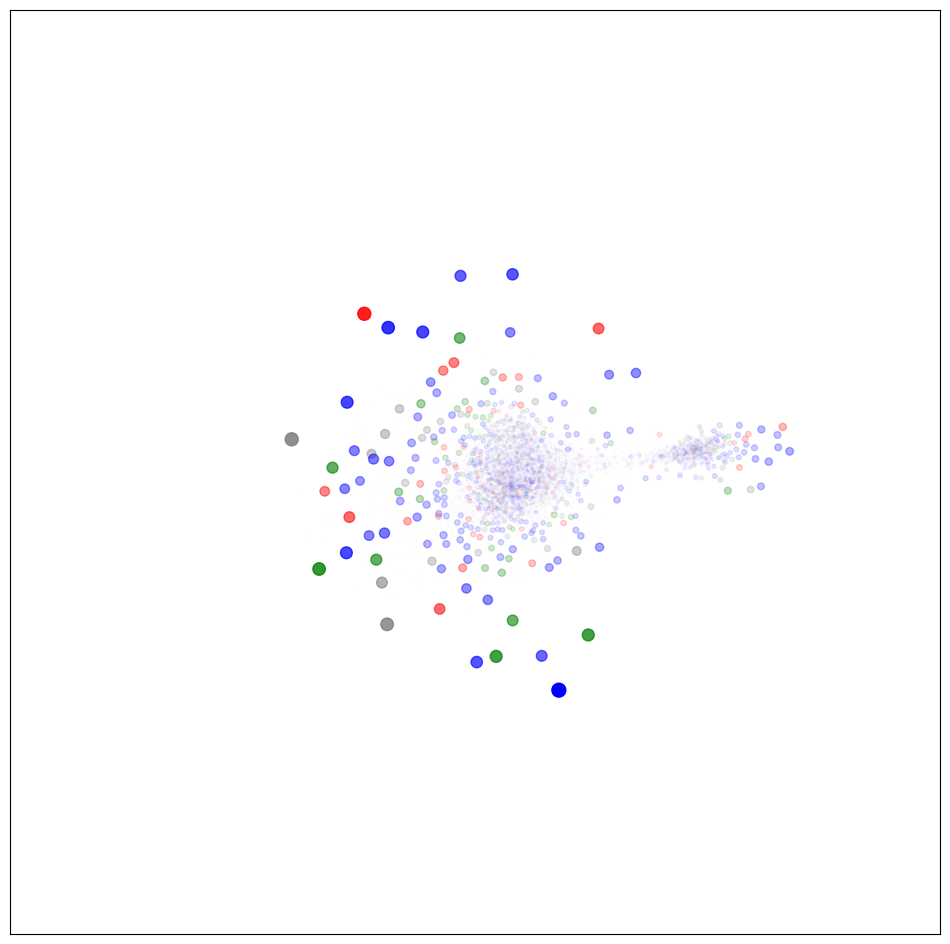

In [11]:
# Color
color_map_dict = {
    'No Retweets': 'gray',
    'Izquierda': 'blue',
    'Derecha': 'red',
    'Centro': 'green'
}
color_map_node = [color_map_dict[subgraph.nodes[node]['Political Label']] for node in subgraph]
color_edge_map = [color_map_dict[subgraph.nodes(data=True)[edge[1]]['Political Label']] for edge in list(subgraph.edges(data=True))]

# Alpha
degrees = dict(subgraph.degree())
max_degree = max(degrees.values())
alpha_values = [(degree / max_degree) for degree in degrees.values()]

# Size
node_degrees = [subgraph.degree(node) * 100 for node in subgraph.nodes()]
def normalize(x, max, min):
    return 100 * ((x - min)/(max - min))
max_deg = max(node_degrees)
min_deg = min(node_degrees)
node_size = list(map(lambda x: normalize(x, max_deg, min_deg), node_degrees))

fig, ax = plt.subplots(figsize = (12,12))

nx.draw_networkx_nodes(subgraph, layout_subgraph, node_color = color_map_node, node_size = node_size, ax = ax, alpha = alpha_values)
#nx.draw_networkx_edges(g_nx, layout, edge_color=color_edge_map, alpha = 0.01)
plt.show()

## Biggest Component but with colored Edges

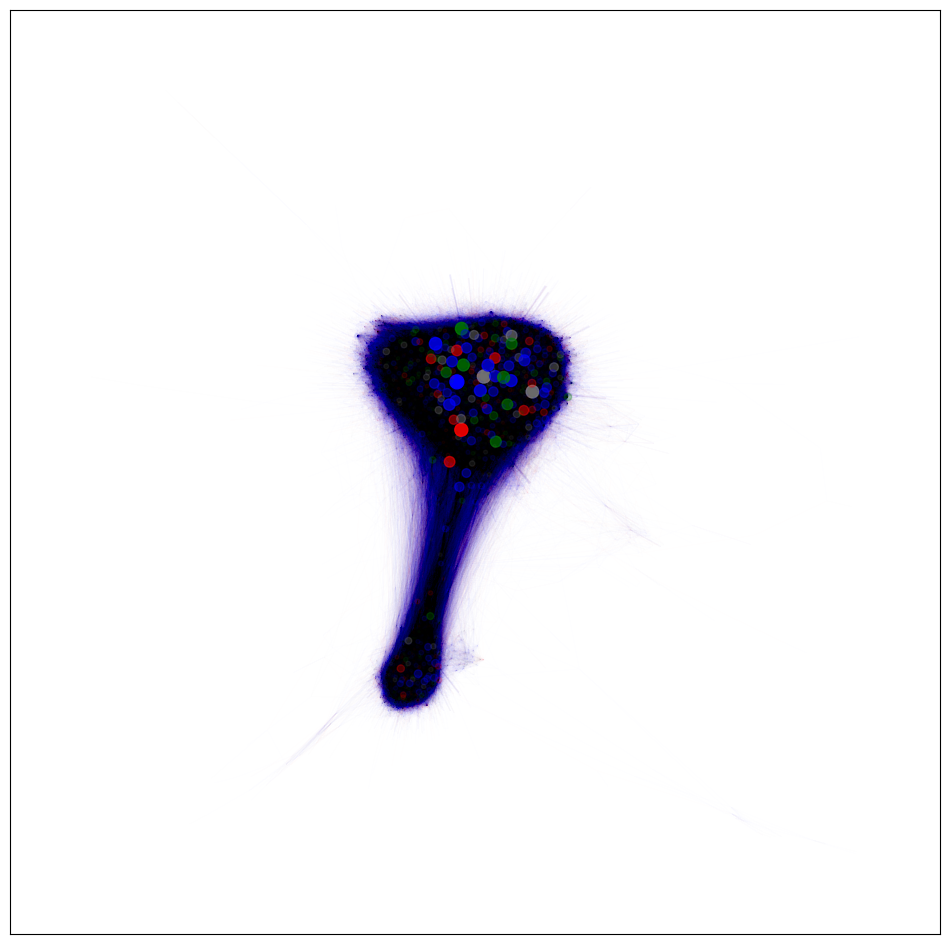

In [51]:
# Color
color_map_dict = {
    'No Retweets': 'gray',
    'Izquierda': 'blue',
    'Derecha': 'red',
    'Centro': 'green'
}
color_map_node = [color_map_dict[subgraph.nodes[node]['Political Label']] for node in subgraph]
color_edge_map = [color_map_dict[subgraph.nodes(data=True)[edge[1]]['Political Label']] for edge in list(subgraph.edges(data=True))]

# Alpha
degrees = dict(subgraph.degree())
max_degree = max(degrees.values())
alpha_values = [(degree / max_degree) for degree in degrees.values()]

# Size
node_degrees = [subgraph.degree(node) * 100 for node in subgraph.nodes()]
def normalize(x, max, min):
    return 100 * ((x - min)/(max - min))
max_deg = max(node_degrees)
min_deg = min(node_degrees)
node_size = list(map(lambda x: normalize(x, max_deg, min_deg), node_degrees))

fig, ax = plt.subplots(figsize = (12,12))

nx.draw_networkx_nodes(subgraph, layout_subgraph, node_color = color_map_node, node_size = node_size, ax = ax, alpha = alpha_values)
nx.draw_networkx_edges(subgraph, layout_subgraph, edge_color=color_edge_map, alpha = 0.003)
plt.show()

## Just Derecha Nodes (no degree scaling for alpha nor size)

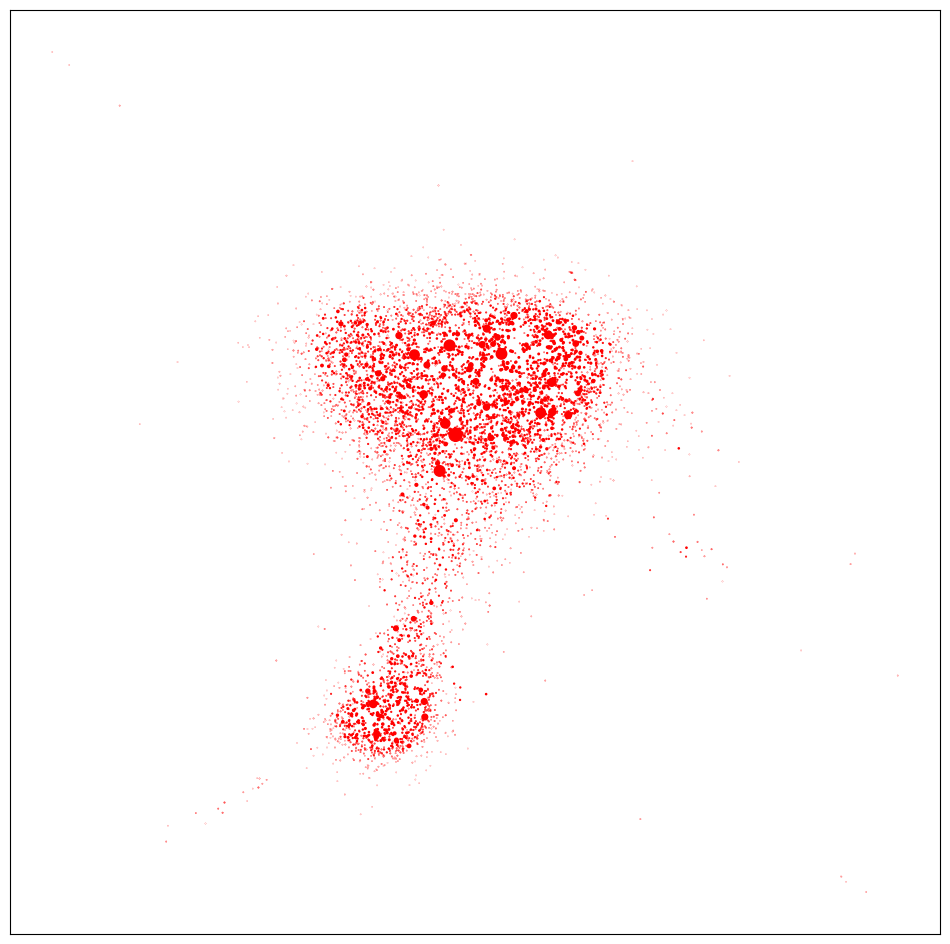

In [56]:
derecha_nodes = [node for node, attrs in subgraph.nodes(data=True) if attrs.get('Political Label') == 'Derecha']

# Color
color_map_dict = {
    'No Retweets': 'gray',
    'Izquierda': 'blue',
    'Derecha': 'red',
    'Centro': 'green'
}
d_color_map_node = [color_map_dict[subgraph.nodes[node]['Political Label']] for node in derecha_nodes]
color_edge_map = [color_map_dict[subgraph.nodes(data=True)[edge[1]]['Political Label']] for edge in list(subgraph.edges(data=True))]

# Alpha
degrees = dict(subgraph.degree())
max_degree = max(degrees.values())
d_alpha_values = [(degree / max_degree) for node, degree in degrees.items() if node in derecha_nodes]

# Size
d_node_degrees = [subgraph.degree(node) * 100 for node in derecha_nodes]
def normalize(x, max, min):
    return 100 * ((x - min)/(max - min))
max_deg = max(node_degrees)
min_deg = min(node_degrees)
d_node_size = list(map(lambda x: normalize(x, max_deg, min_deg), d_node_degrees))

fig, ax = plt.subplots(figsize = (12,12))
nx.draw_networkx_nodes(subgraph, layout_subgraph, nodelist=derecha_nodes, node_color = d_color_map_node, node_size = d_node_size, ax = ax)

## Just Izquierda Nodes (no degree scaling for alpha nor size)

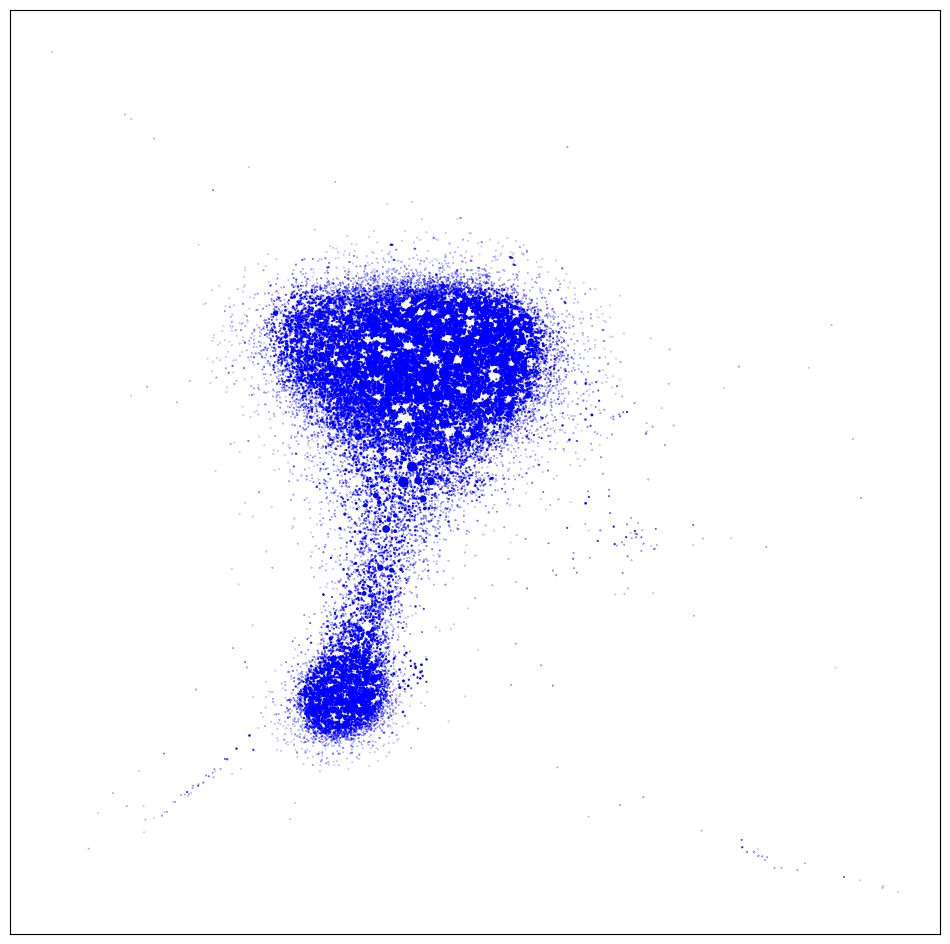

In [60]:
izquierda_nodes = [node for node, attrs in subgraph.nodes(data=True) if attrs.get('Political Label') == 'Izquierda']

# Color
color_map_dict = {
    'No Retweets': 'gray',
    'Izquierda': 'blue',
    'Derecha': 'red',
    'Centro': 'green'
}
i_color_map_node = [color_map_dict[subgraph.nodes[node]['Political Label']] for node in izquierda_nodes]
color_edge_map = [color_map_dict[subgraph.nodes(data=True)[edge[1]]['Political Label']] for edge in list(subgraph.edges(data=True))]

# Alpha
degrees = dict(subgraph.degree())
max_degree = max(degrees.values())
i_alpha_values = [(degree / max_degree) for node, degree in degrees.items() if node in izquierda_nodes]

# Size
i_node_degrees = [subgraph.degree(node) * 100 for node in izquierda_nodes]
def normalize(x, max, min):
    return 100 * ((x - min)/(max - min))
max_deg = max(node_degrees)
min_deg = min(node_degrees)
i_node_size = list(map(lambda x: normalize(x, max_deg, min_deg), i_node_degrees))

fig, ax = plt.subplots(figsize = (12,12))
nx.draw_networkx_nodes(subgraph, layout_subgraph, nodelist=izquierda_nodes, node_color = i_color_map_node, node_size = i_node_size, ax = ax)

## Just Centro Nodes (no degree scaling for alpha nor size)

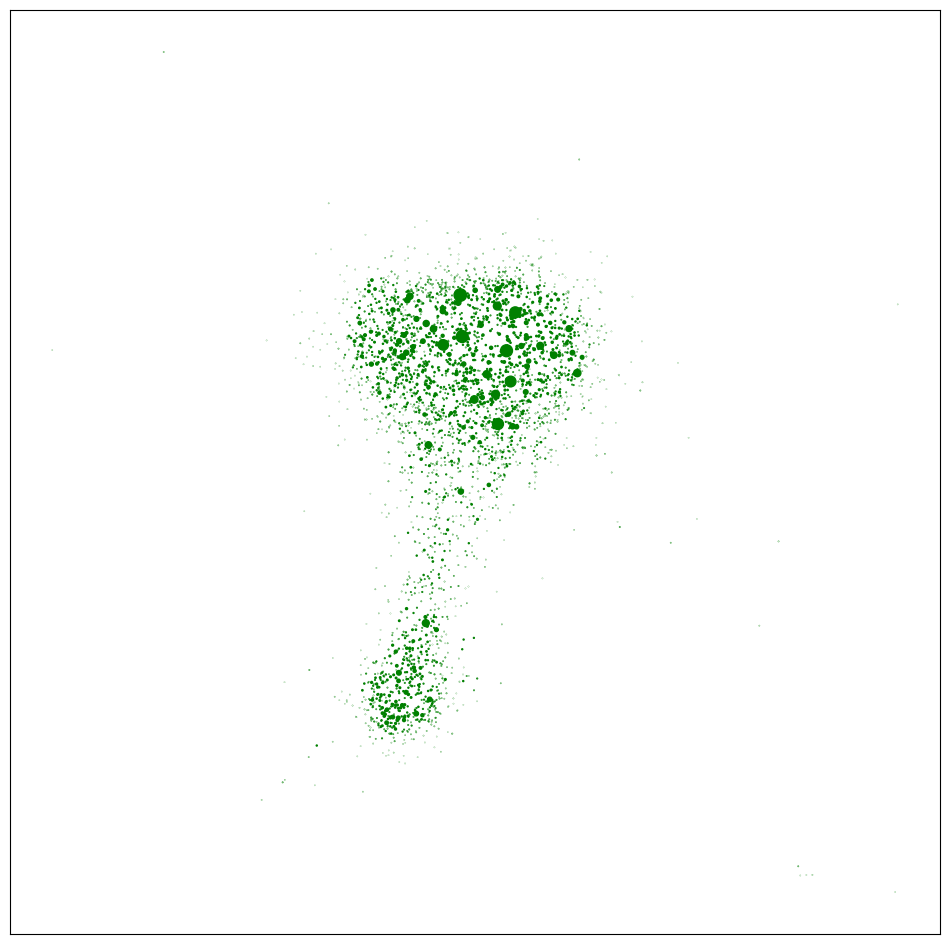

In [59]:
centro_nodes = [node for node, attrs in subgraph.nodes(data=True) if attrs.get('Political Label') == 'Centro']

# Color
color_map_dict = {
    'No Retweets': 'gray',
    'Izquierda': 'blue',
    'Derecha': 'red',
    'Centro': 'green'
}
c_color_map_node = [color_map_dict[subgraph.nodes[node]['Political Label']] for node in centro_nodes]
color_edge_map = [color_map_dict[subgraph.nodes(data=True)[edge[1]]['Political Label']] for edge in list(subgraph.edges(data=True))]

# Alpha
degrees = dict(subgraph.degree())
max_degree = max(degrees.values())
c_alpha_values = [(degree / max_degree) for node, degree in degrees.items() if node in centro_nodes]

# Size
c_node_degrees = [subgraph.degree(node) * 100 for node in centro_nodes]
def normalize(x, max, min):
    return 100 * ((x - min)/(max - min))
max_deg = max(node_degrees)
min_deg = min(node_degrees)
c_node_size = list(map(lambda x: normalize(x, max_deg, min_deg), c_node_degrees))

fig, ax = plt.subplots(figsize = (12,12))
nx.draw_networkx_nodes(subgraph, layout_subgraph, nodelist=centro_nodes, node_color = c_color_map_node, node_size = c_node_size, ax = ax)

## Force Atlas 2 Gephi's Coordinates

### Whole Graph

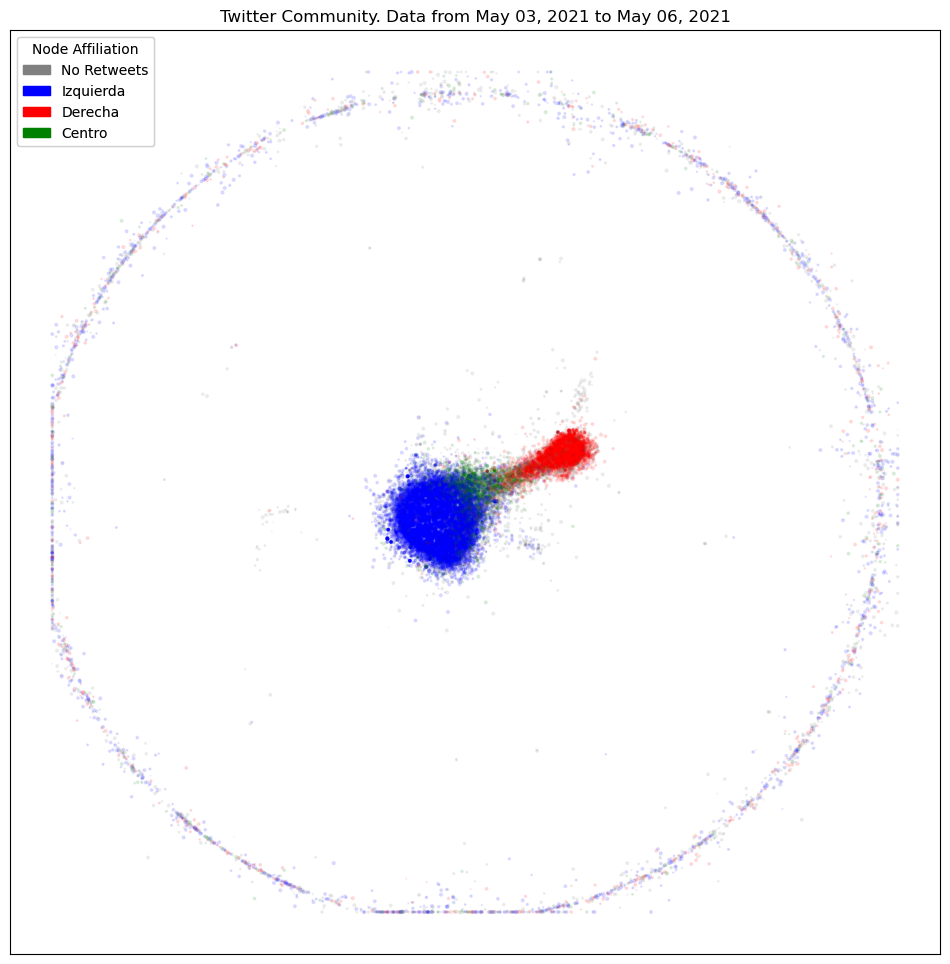

In [73]:
# Color
color_map_dict = {
    'No Retweets': 'gray',
    'Izquierda': 'blue',
    'Derecha': 'red',
    'Centro': 'green'
}
t_color_map_node = [color_map_dict[g_nx.nodes[node]['Political Label']] for node in g_nx.nodes]
color_edge_map = [color_map_dict[g_nx.nodes(data=True)[edge[0]]['Political Label']] for edge in list(g_nx.edges(data=True))]

# Alpha
degrees = dict(g_nx.degree())
max_degree = max(degrees.values())
t_alpha_values = [(degree / max_degree) for node, degree in degrees.items() if node in g_nx.nodes]

# Size
t_node_degrees = [g_nx.degree(node) * 200 for node in g_nx.nodes]
def normalize(x, max, min):
    return 100 * ((x - min)/(max - min))
max_deg = max(node_degrees)
min_deg = min(node_degrees)
t_node_size = list(map(lambda x: normalize(x, max_deg, min_deg), g_nx.nodes))

fig, ax = plt.subplots(figsize = (12,12))
# Create a legend for node colors
node_legend = [mpatches.Patch(color=color, label=label) for label, color in color_map_dict.items()]
node_legend_title = 'Node Affiliation'
node_legend_handle = plt.legend(handles=node_legend, title=node_legend_title, loc='upper left')

starting_date_obj = datetime.strptime(date, '%Y-%m-%d')
formatted_starting = starting_date_obj.strftime('%B %d, %Y')
ending_date_obj = starting_date_obj + timedelta(days=3)
formatted_ending = ending_date_obj.strftime('%B %d, %Y')

ax.add_artist(node_legend_handle)

plt.title(f"Twitter Community. Data from {formatted_starting} to {formatted_ending}")
nx.draw_networkx_nodes(g_nx, gephi_pos, node_color = t_color_map_node, node_size = t_node_size, ax = ax, alpha=0.1)
plt.show()

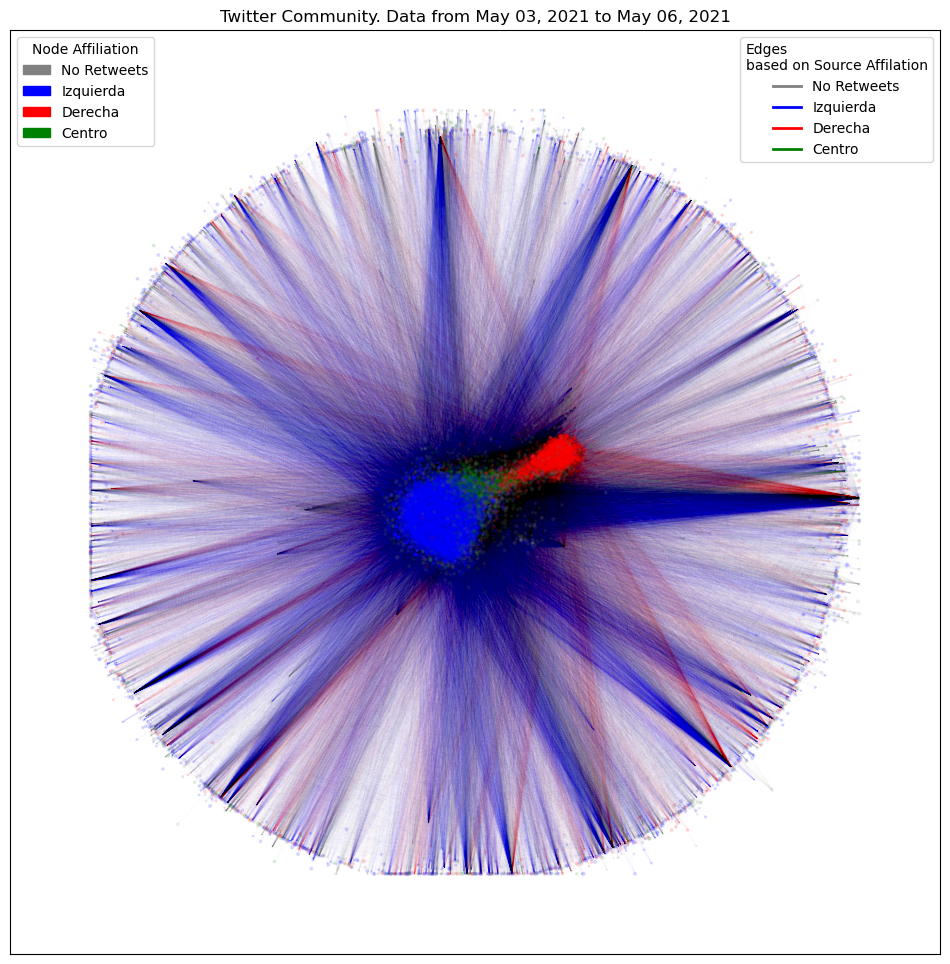

In [70]:
# Color
color_map_dict = {
    'No Retweets': 'gray',
    'Izquierda': 'blue',
    'Derecha': 'red',
    'Centro': 'green'
}
t_color_map_node = [color_map_dict[g_nx.nodes[node]['Political Label']] for node in g_nx.nodes]
color_edge_map = [color_map_dict[g_nx.nodes(data=True)[edge[1]]['Political Label']] for edge in list(g_nx.edges(data=True))]

# Alpha
degrees = dict(g_nx.degree())
max_degree = max(degrees.values())
t_alpha_values = [(degree / max_degree) for node, degree in degrees.items() if node in g_nx.nodes]

# Size
t_node_degrees = [g_nx.degree(node) * 200 for node in g_nx.nodes]
def normalize(x, max, min):
    return 100 * ((x - min)/(max - min))
max_deg = max(node_degrees)
min_deg = min(node_degrees)
t_node_size = list(map(lambda x: normalize(x, max_deg, min_deg), g_nx.nodes))

fig, ax = plt.subplots(figsize = (12,12))
nx.draw_networkx_nodes(g_nx, gephi_pos, node_color = t_color_map_node, node_size = t_node_size, ax = ax, alpha=0.1)
nx.draw_networkx_edges(g_nx, gephi_pos, edge_color=color_edge_map, alpha = 0.002)


# Create a legend for node colors
node_legend = [mpatches.Patch(color=color, label=label) for label, color in color_map_dict.items()]
node_legend_title = 'Node Affiliation'
node_legend_handle = plt.legend(handles=node_legend, title=node_legend_title, loc='upper left')

# Create a legend for edge colors
edge_legend = [mlines.Line2D([0], [0], color=color, label=label, linewidth=2) for label, color in color_map_dict.items()]
edge_legend_title = 'Edges\nbased on Source Affilation'
edge_legend_handle = plt.legend(handles=edge_legend, title=edge_legend_title, alignment= 'center', loc='upper right')

# Add the legends to the plot
ax.add_artist(node_legend_handle)

# Title
starting_date_obj = datetime.strptime(date, '%Y-%m-%d')
formatted_starting = starting_date_obj.strftime('%B %d, %Y')
ending_date_obj = starting_date_obj + timedelta(days=3)
formatted_ending = ending_date_obj.strftime('%B %d, %Y')


plt.title(f"Twitter Community. Data from {formatted_starting} to {formatted_ending}")
plt.show()